# Speed Limits and Accidents in Minnesota
### Team Members:
- Robert
- Jon
- Calvin
- Mike

## Questions and Summary

**How do speed limits on Minnesota roads relate to accidents?**

1. Does the speed of a road lead to a higher number of accidents?

2. Is there a relationship between accident severity and speed limit?

    - As speed limit increases, frequency of accedents increases
        - Hypothesis testing shows statistical signifigance
        - Regression shows strong correlation
    - Severity data was not what we thought it was
        - Severity in dataset indicated impact on traffic
        - Analysis of severity did not lead to any meaningful conclusion


## Data Cleanup & Exploration

Our data was pulled from: https://www.kaggle.com/sobhanmoosavi/us-accidents



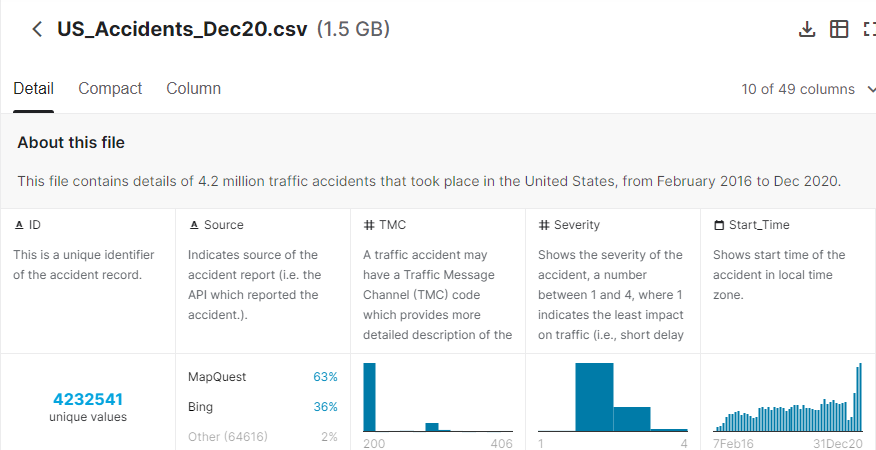

Our .csv file had 105,498 rows and 50 columns after being narrowed down to accidents that happened in Minnesota.

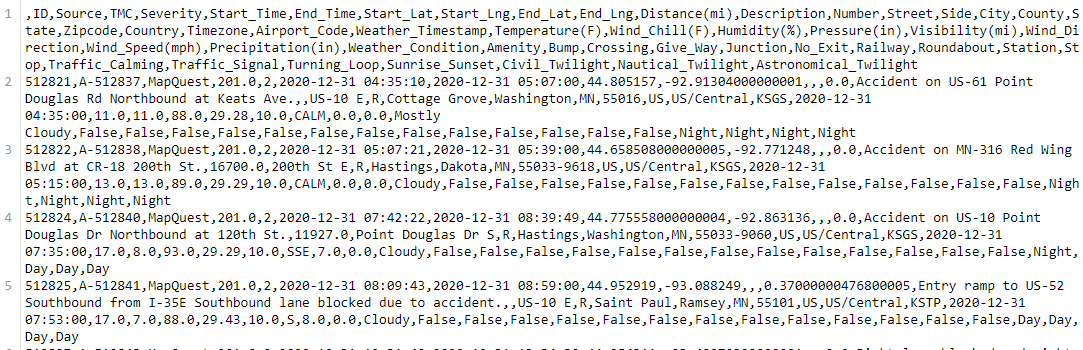

We eliminated the unnecessary columns.

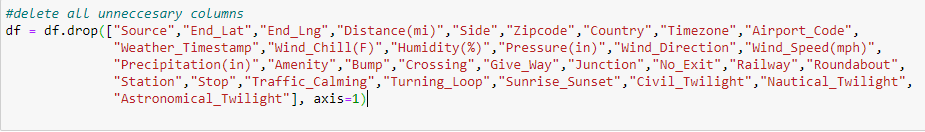

Then narrowed the data further to only 2020 accidents. 

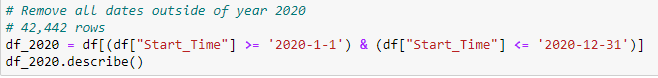

From here we could do an API request from Google to get speed limits using the latitude and longitude location.
We discovered Google would only provide speed limit data to Premium Plan members and that membership level is no
longer available.

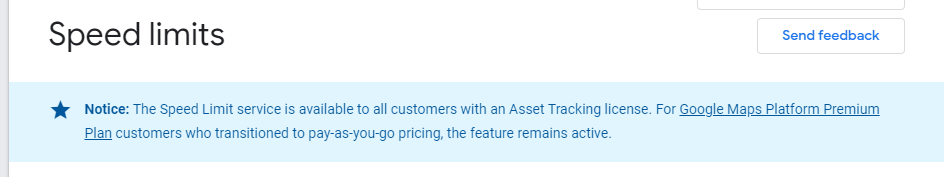

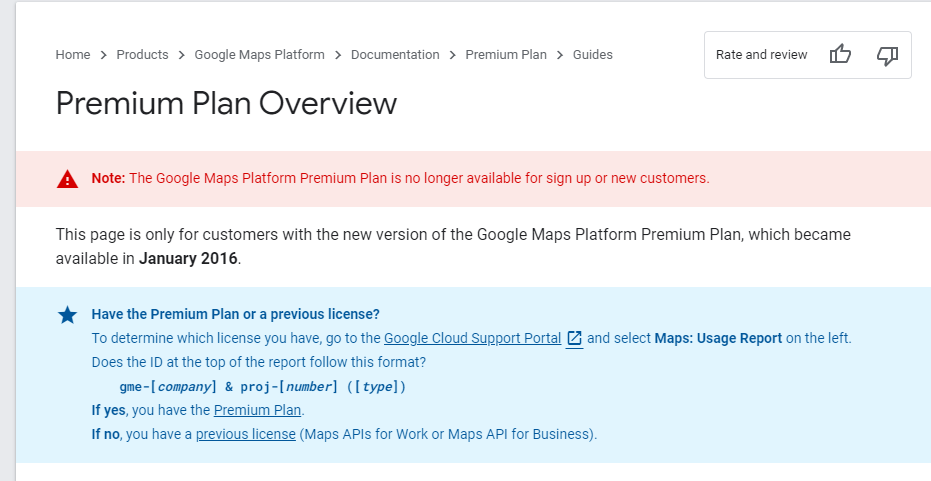

We found MapQuest also has an API request for speed limit data.

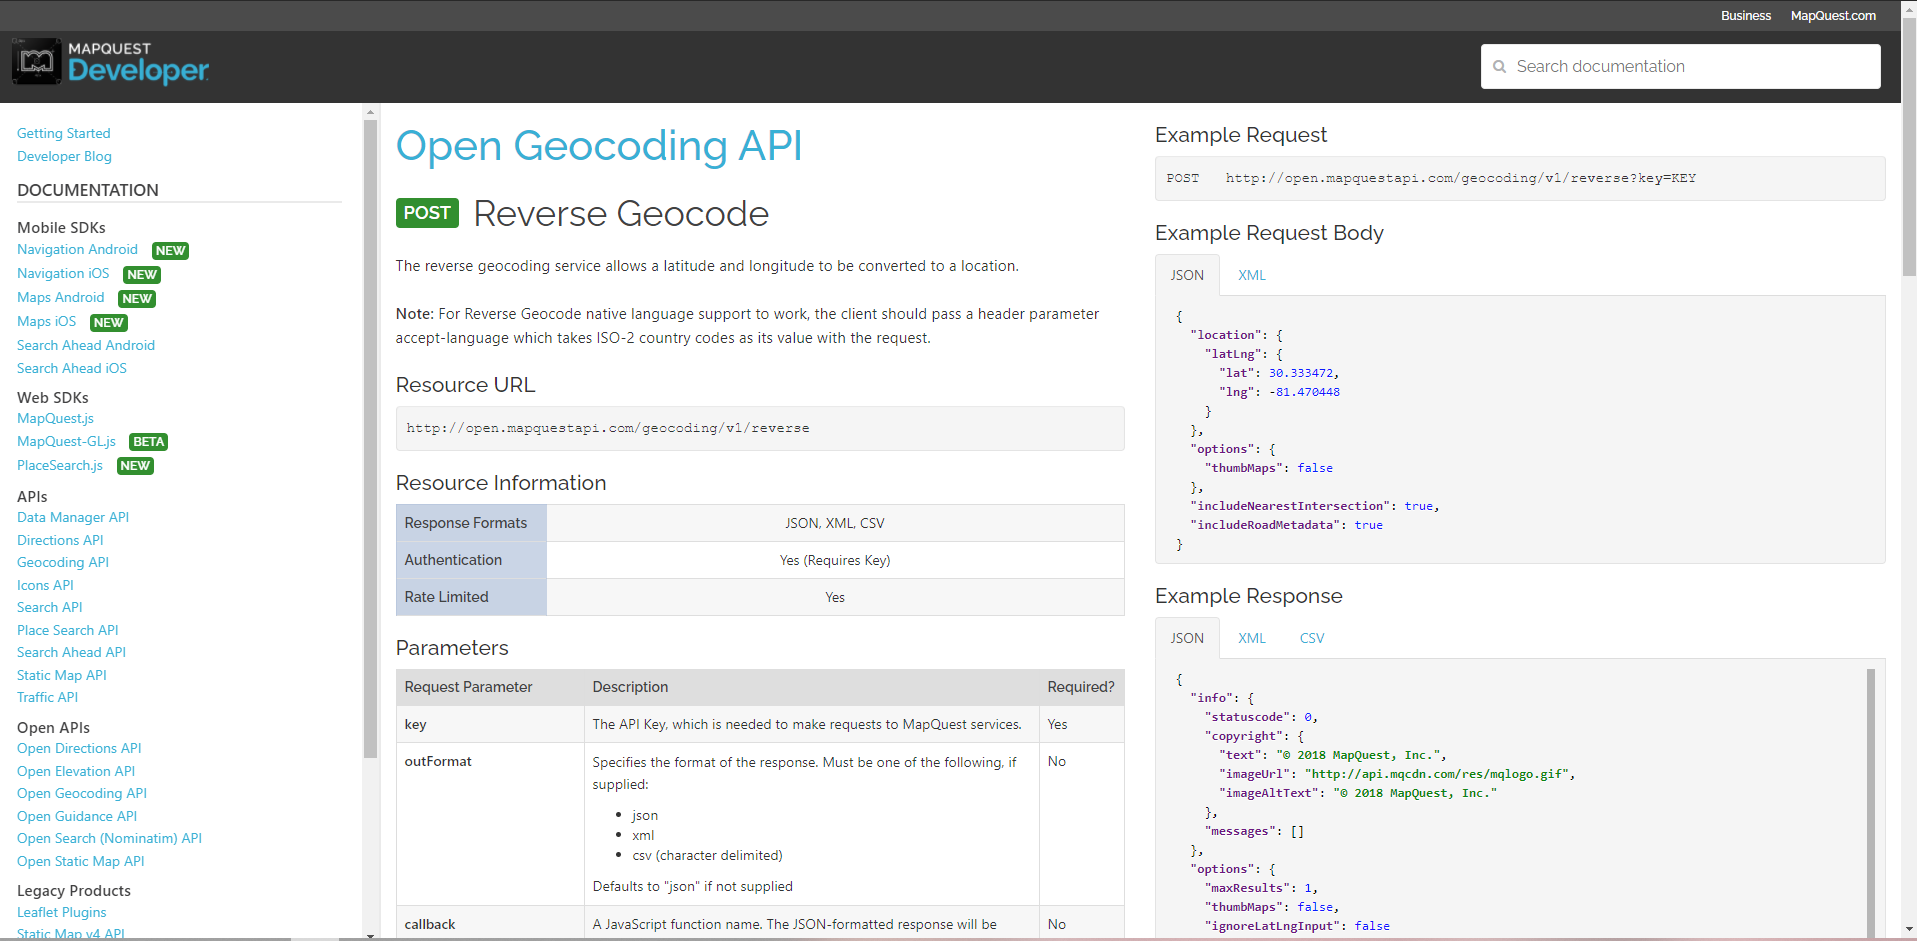

We can request up to 15,000 speed limits per API Key.

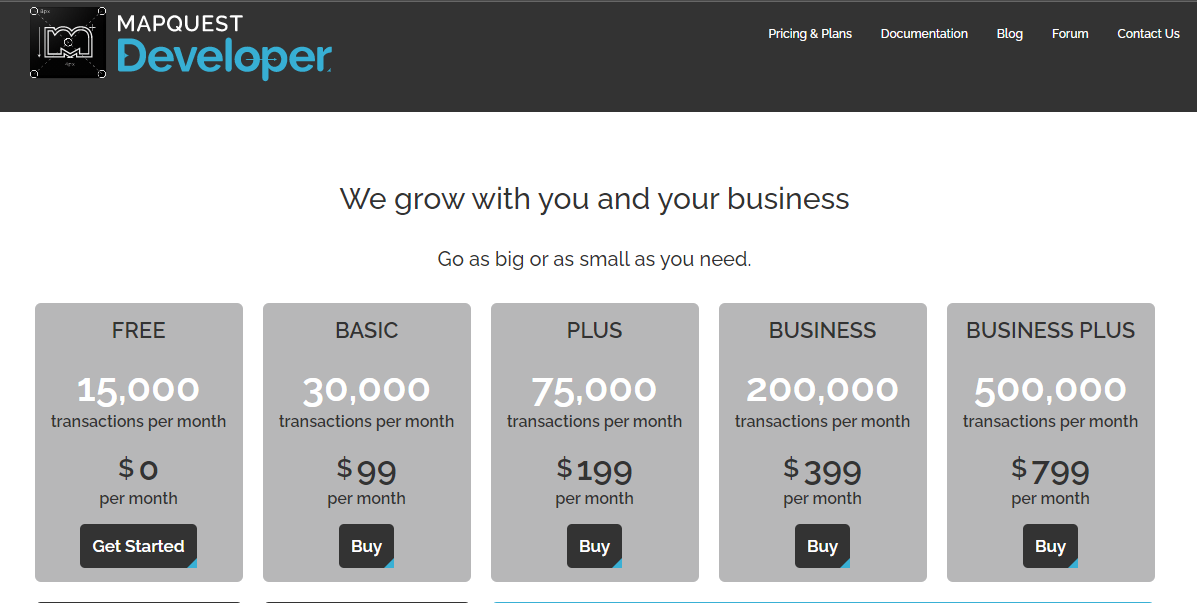

We broke up our DataFrame with 42,442 rows into 4 parts to keep our requests free. 

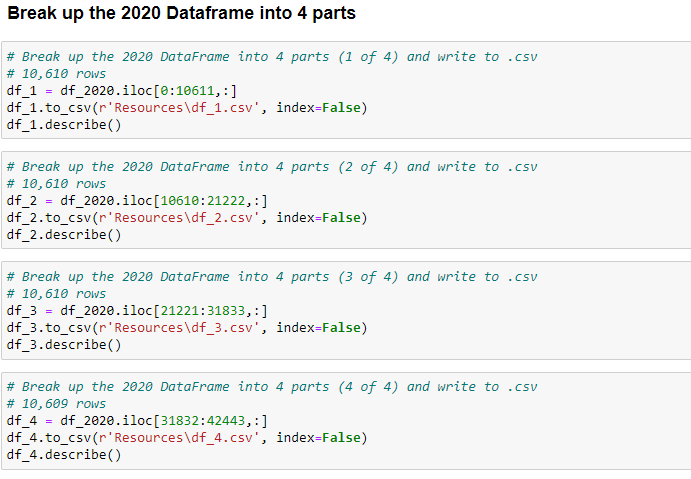

A for loop was used for the API speed limit requests.

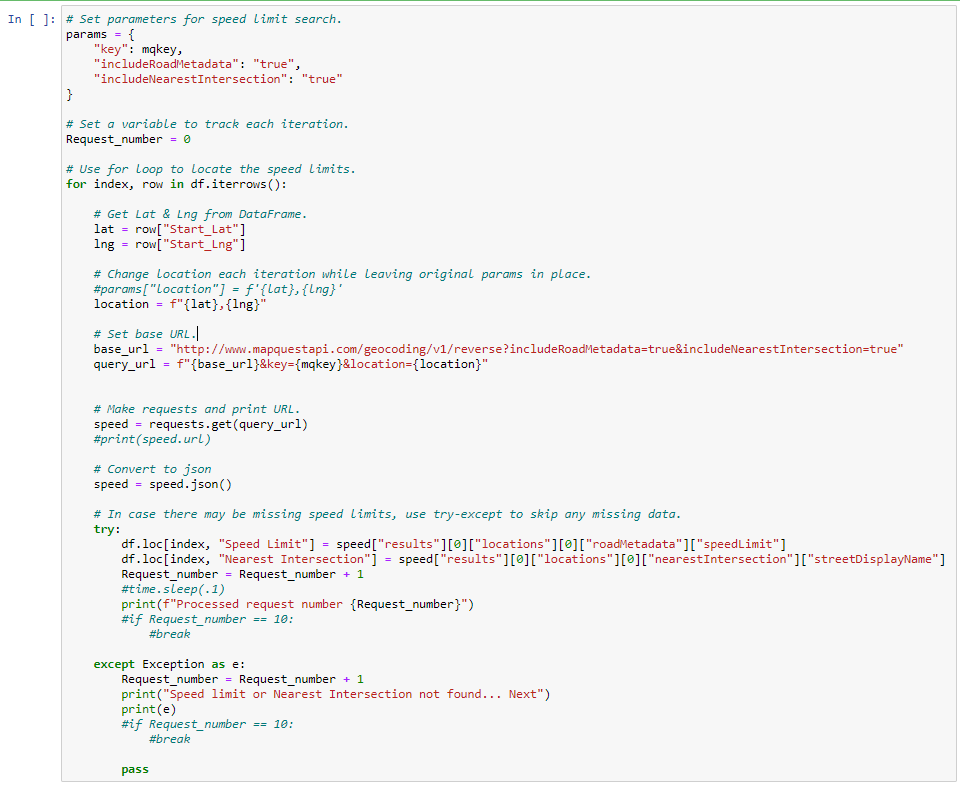

The four DataFrames were saved to a .csv file.

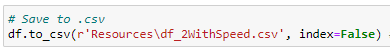

Then combined to a single .csv.

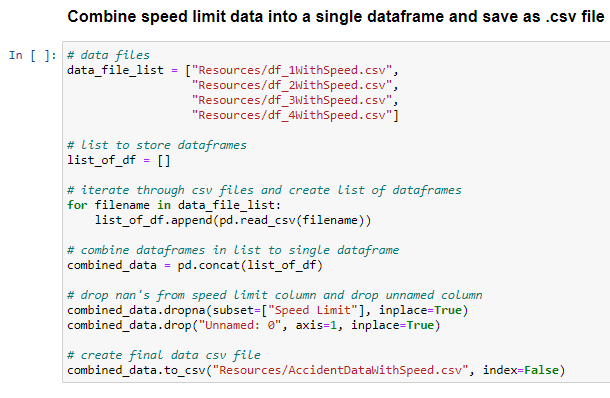

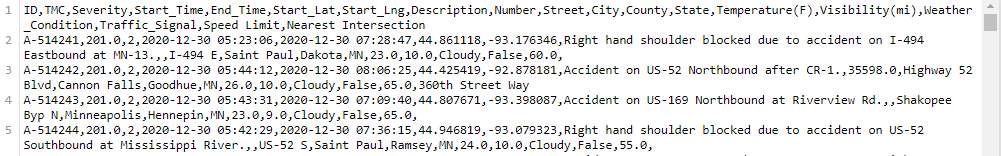

Our Dataframe now looked like this:

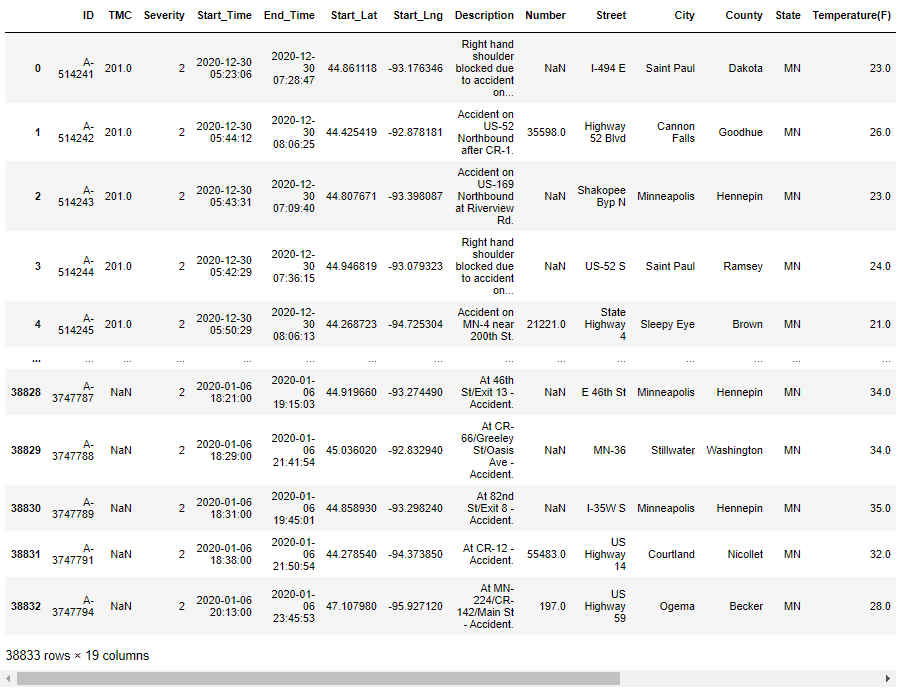

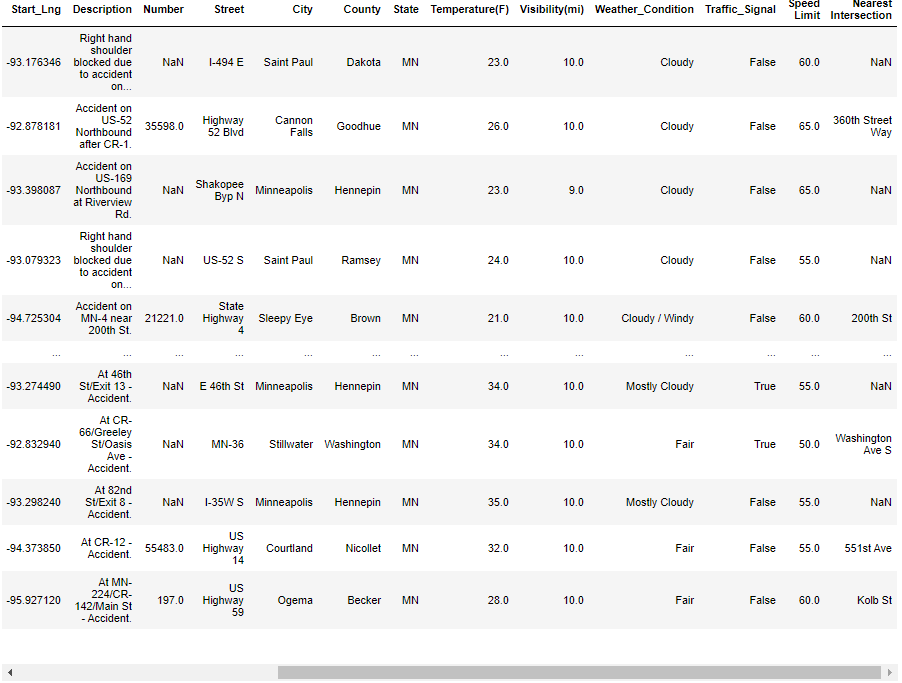

## Data Analysis

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import time
import os
from scipy.stats import linregress
from citipy import citipy
import scipy.stats as stats

In [ ]:
# import csv
file = 'Resources/AccidentDataWithSpeed.csv'
df = pd.read_csv(file)
df.head()

In [ ]:
# Calvin's heat map starts here

We started by visualizing density of incidents by locations on a map of Minnesota.

We then weighted by severity but because the amount of severity 2 incidents greatly outwieghs all other points it didn't show us anything significantly different than simply density of points.



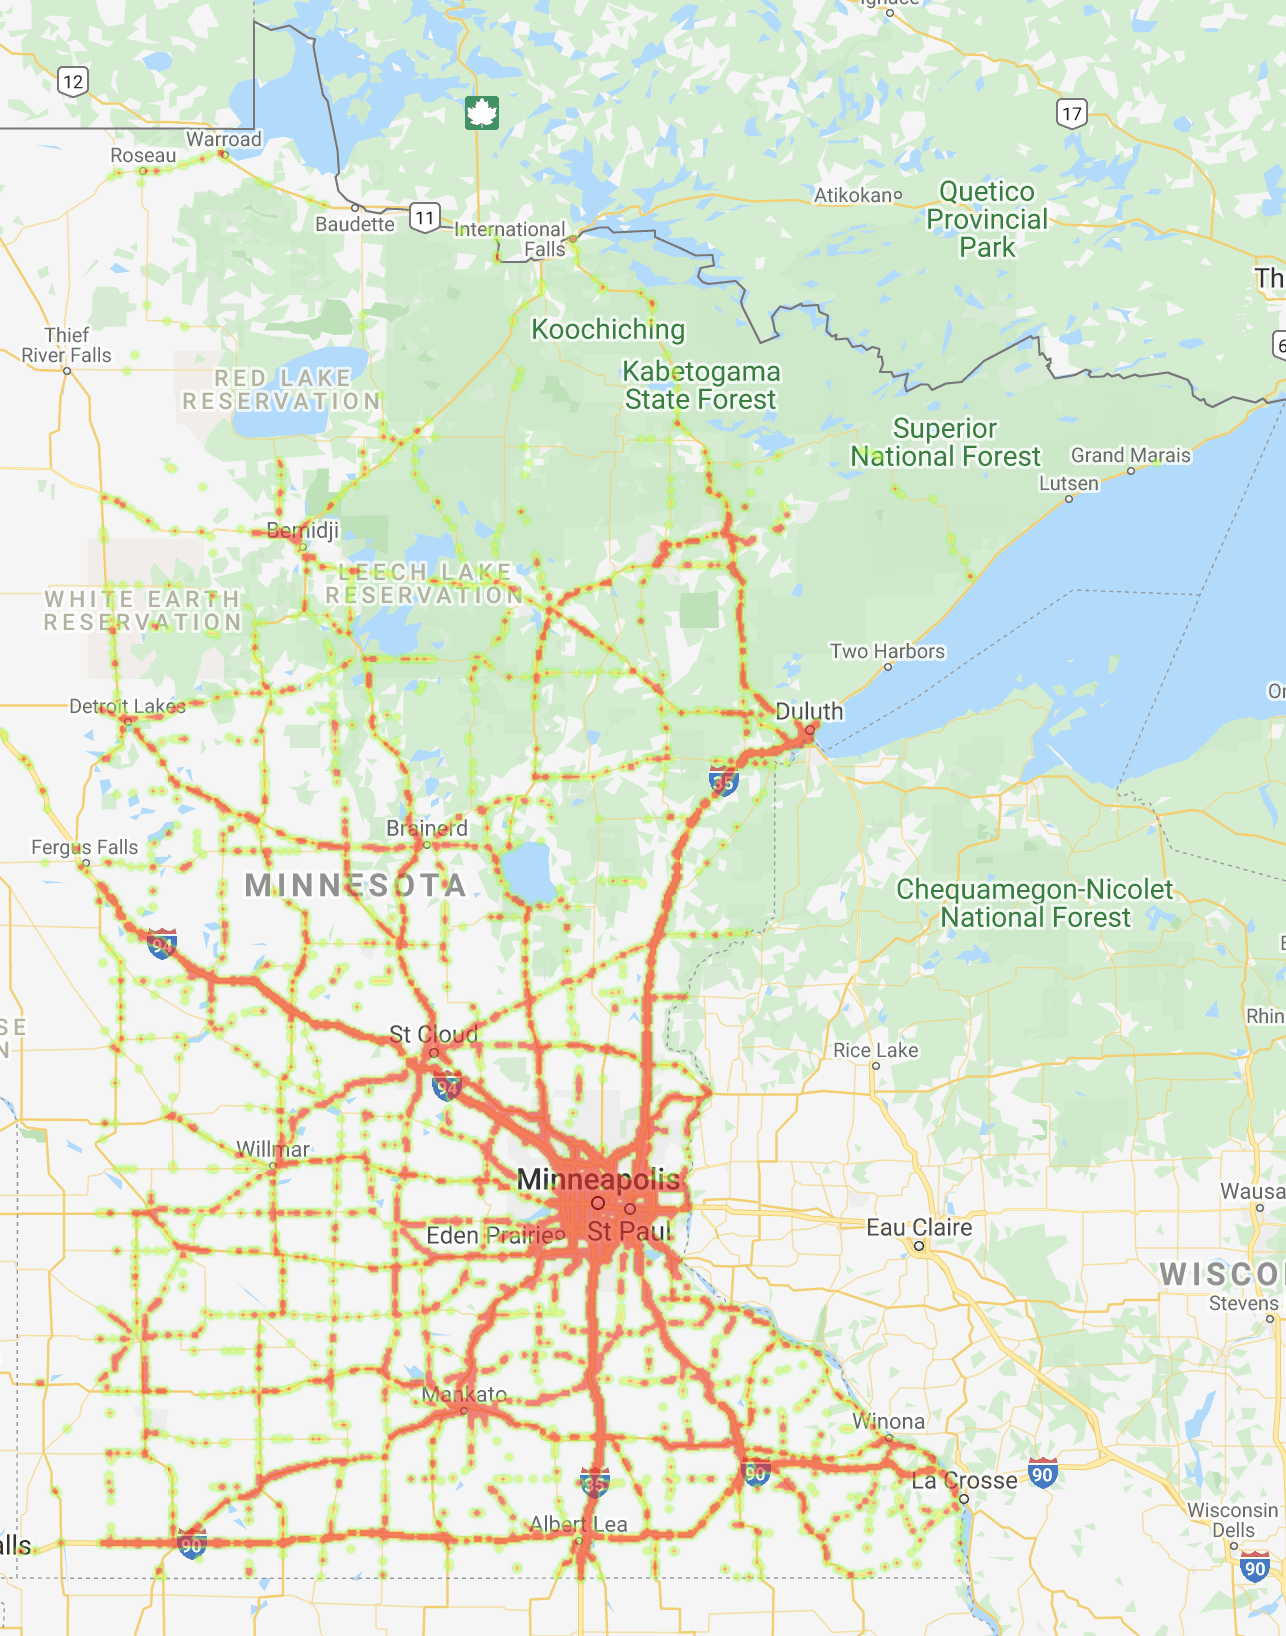

In [ ]:
# Calvin's heat map ends here

In [ ]:
# Jon's graphs start here

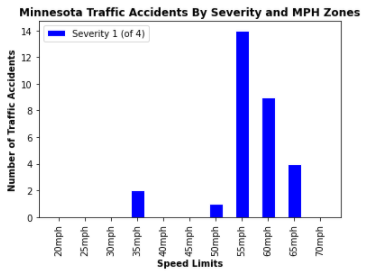

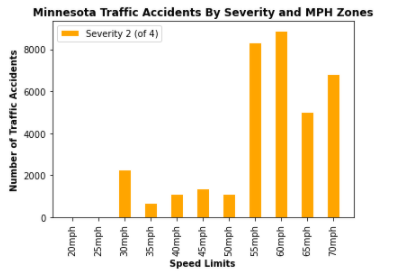

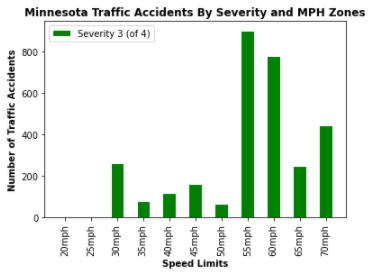

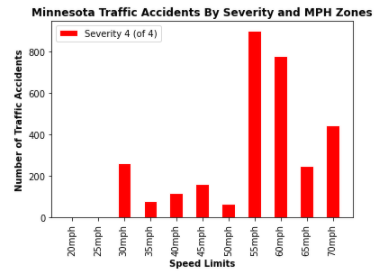

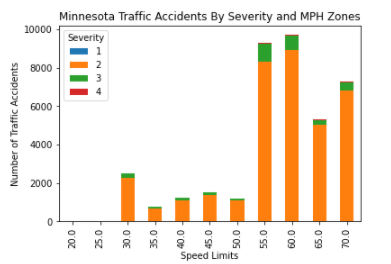

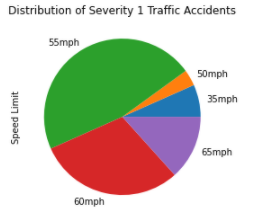

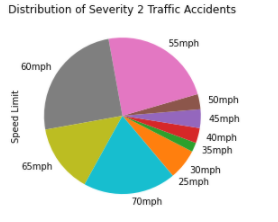

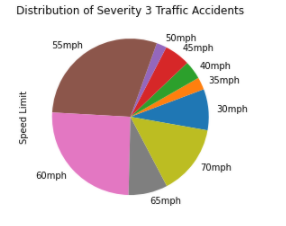

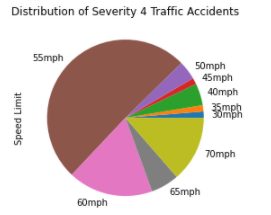

In [ ]:
# Jon's graphs end here

In [ ]:
# Mike's hypothesis starts here

In [ ]:
speed_group = df.groupby("Speed Limit")
speed_count = speed_group["ID"].count().reset_index()
speed_count

In [ ]:
# place data into binned categories for hypothesis test
bins = [20, 35, 50, 70]
bin_labels = ["20-35", "35-50", ">50"]

speed_count["Bin"] = pd.cut(speed_count["Speed Limit"], bins, labels=bin_labels, include_lowest=True)
speed_count

In [ ]:
# calculate average number of accidents in each speed limit bin
speed_bin_group = speed_count.groupby("Bin")
speed_bin_group.mean()

In [ ]:
# place binned data into group variables for ANOVA test
group1 = speed_count[speed_count["Bin"] == "20-35"]["ID"]
group2 = speed_count[speed_count["Bin"] == "35-50"]["ID"]
group3 = speed_count[speed_count["Bin"] == ">50"]["ID"]


# perform ANOVA test
p_value = stats.f_oneway(group1, group2, group3)
print(f"p-value = {p_value[1]}")

In [ ]:
# create box plot of data
speed_count.boxplot("ID", by="Bin", figsize=(15,10))
plt.title("Accident Box Plot")
plt.xlabel("Speed Limits")
plt.ylabel("Count of Accidents")
plt.show()

In [ ]:
# Mike's hypothesis ends here

In [ ]:
# Roberts's regression starts here

## Linear Regression of Speed Limit Impact on Accicent Counts

#### Setup and Setting Plot Values

In [ ]:
scatterdf = df
count2 = scatterdf.groupby(["Speed Limit"])
count2 = count2.count().reset_index()
x_axis = count2["Speed Limit"]
y_axis = count2["ID"]

#### Scatterplot Showing Base Data and Correlation

In [ ]:
plt.title("Number of Incidents by Speed Limit on Road")
plt.xlabel("Speed Limit")
plt.ylabel("Number of Accidents")
plt.scatter(x_axis, y_axis, edgecolors = "black", marker="o", color="red")

#### Scatterpolt Weighted and Scaled by Severity

In [ ]:
plt.title("Number of Incidents by Speed Limit on Road")
plt.xlabel("Speed Limit")
plt.ylabel("Number of Accidents")
plt.scatter(x_axis, y_axis, s= count2["Severity"], edgecolors= "black", marker="o", color="red")

#### Regression

In [ ]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"b-",)
plt.annotate(line_eq,(20,8000),fontsize=15,color="blue")
plt.annotate(round(rvalue**2,2),(20,7000),fontsize=15,color="blue")
plt.title("Number of Incidents by Speed Limit on Road")
plt.xlabel("Speed Limit")
plt.ylabel("Number of Accidents")
plt.scatter(x_axis, y_axis, edgecolors = "black", marker="o", color="red")

In [ ]:
# Robert's regression ends here

## Discussion

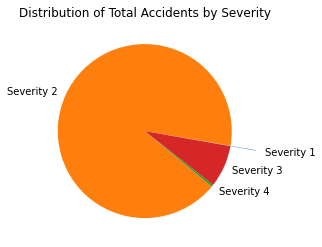


For our first question found what we expected.  We expected that as speed inceases the number of incidents increases as well.  Using an ANOVA test we got a p-value of 0.002 rejecting our null hypothesis and suggesting our hypothesis was correct higher speeds are correlated to higher crash incidents.
    
    
Our second question of whether higher speeds correlate to severity of accidents we were unable to draw any meaningful conclusions.  The severity data was not what we thought it was, it represented impact on traffic delays rather than physical injury outcomes.  Another issue was the way the data was distributed, the shear number on data points for category 2 skewed the data too much that statistical tests were inconclusive.   
   
   



## Post Mortem

- Dataset began as 1.5 GB, with data from all states in the US. Trimmming down the dataset was neccessary.
- Initial Data Interpretation was that of Severity meant higher injury/fatality occurences. The TMC code we were using did not show what our initial interptretation of the data represented. Our research led to finding out Severity was the impact on overall Traffic Flow of vehicles on the road.
- Initial idea was to pull Speed Limit data from Google, using a Google API call. Access to the Speed Limit information was restricted to a professional account, so our API call had to be switched to MapQuest.
- Dataset was restricted to the Speed Limit of the road being travelled. Additional data could be researched from other sources like Minnesota State Patrol or Hospital records that show actual speed being travelled when accident occured, or severity of injury in accident.
- Dataset is restricted to only incidents where the Police were called and a report filed. This could lead to an incomplete dataset.
- Many more factors are included in the dataset, such as weather, time of day, cloudiness, and location of nearest traffic signs that could have an influence on accidents occuring.

## Questions